# Direct Kinematics

[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/AIResearchLab/foundations-of-robotics-labs/blob/master/3-kinematics/02-direct-kinematics.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/AIResearchLab/foundations-of-robotics-labs/master?filepath=3-kinematics/02-direct-kinematics.ipynb)

This notebook looks at direct kinematics. The notebook contains functions to compute the position of the `End-effector (EE)` of the Kinova Gen3 lite from the joint positions.

> The purpose of this notebook is to start understanding the kinematics of a robot manipulator such as the Kinova Gen3 lite.

## What is Kinematics?

Kinematics is the study of **motion without considering the forces that cause the motion**. In robotics, kinematics is used to describe the motion of a robot manipulator without considering the forces that cause the motion. For the purposes of robot manipulators, kinematics is divided into two types: `direct kinematics` and `inverse kinematics`.

1. **Direct Kinematics** - Direct kinematics is the process of finding the position and orientation of the end-effector of a robot manipulator given the joint positions.
2. **Inverse Kinematics** - Inverse kinematics is the process of finding the joint positions of a robot manipulator given the position and orientation of the end-effector.

The relationship between the joint positions and the position and orientation of the end-effector is described by the kinematic equations of the robot manipulator. A neat way to represent the kinematic equations of a robot manipulator is by using the `Denavit-Hartenberg (DH) parameters`.

## An Introduction to DH parameters

can't see the video? click [here](https://www.youtube.com/embed/yRGlxcqWOSs)

<iframe width="936" height="527" src="https://www.youtube.com/embed/yRGlxcqWOSs" title="Denavit-Hartenberg notation" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

### Direct Kinematics

The selected Python code below defines a function named `dh` that calculates a [Denavit-Hartenberg (DH) matrix](https://en.wikipedia.org/wiki/Denavit%E2%80%93Hartenberg_parameters). The DH matrix is a transformation matrix used in robotics to simplify the process of calculating the position and orientation of robot manipulators.

The general form of the matrix equation for the DH transformation matrix is as follows:

$$ T = R_z(\theta) \cdot T_z(d) \cdot T_x(a) \cdot R_x(\alpha) $$

$$ T = \begin{bmatrix} \cos(\theta) & -\sin(\theta)\cos(\alpha) & \sin(\theta)\sin(\alpha) & a \cos(\theta) \\ \sin(\theta) & \cos(\theta)\cos(\alpha) & -\cos(\theta)\sin(\alpha) & a \sin(\theta) \\ 0 & \sin(\alpha) & \cos(\alpha) & d \\ 0 & 0 & 0 & 1 \end{bmatrix} $$

where:

- $ R_z(\theta) $ is a rotation matrix about the z-axis by an angle $\theta$.
- $ T_z(d) $ is a translation matrix along the z-axis by a distance $d$.
- $ T_x(a) $ is a translation matrix along the x-axis by a distance $a$.
- $ R_x(\alpha) $ is a rotation matrix about the x-axis by an angle $\alpha$.

The function `dh` takes four arguments: `theta`, `d`, `a`, and `alpha`. These parameters represent joint angle, link offset, link length, and link twist, respectively, in the DH convention. The parameters `d` and `a` are expected to be in millimeters, while `theta` and `alpha` are expected to be in degrees.

Inside the function, the `math.radians` function is used to convert `theta` and `alpha` from degrees to radians, as trigonometric functions in Python's `math` and `numpy` libraries expect angles to be in radians.

The function then returns a 4x4 numpy array, which represents the DH transformation matrix. This matrix is used to transform coordinates from one frame to another in a robotic manipulator. The matrix is composed of rotation and displacement components, which are calculated using the input parameters and basic trigonometric functions.

[![DH Diagram Wikipedia](https://upload.wikimedia.org/wikipedia/commons/3/3f/Sample_Denavit-Hartenberg_Diagram.png)](https://en.wikipedia.org/wiki/Denavit%E2%80%93Hartenberg_parameters#)

In [ ]:
import math
import numpy as np

# The function dh(theta, d, a, alpha)
def dh(theta: float, d: float, a: float, alpha: float) -> np.array:
    """
    This function returns the denavit hartenberg parameter matrix
    from a given theta, d, a, alpha

    Args:
        theta (float): the angle in degrees
        d (float): the offset in mm
        a (float): the length in mm
        alpha (float): the angle in degrees

    Returns:
        numpy array: the denavit hartenberg parameter matrix
    """

    # Convert degrees to radians
    theta = math.radians(theta)
    alpha = math.radians(alpha)

    # return the denavit hartenberg parameter matrix
    return np.array([
        [np.cos(theta), -1*np.sin(theta)*np.cos(alpha),    np.sin(theta)*np.sin(alpha), a*np.cos(theta)],
        [np.sin(theta),    np.cos(theta)*np.cos(alpha), -1*np.cos(theta)*np.sin(alpha), a*np.sin(theta)],
        [            0,                  np.sin(alpha),                  np.cos(alpha),               d],
        [            0,                              0,                              0,               1]
    ])

## DH in DK

The [direct kinematics (DK)](https://en.wikipedia.org/wiki/Forward_kinematics) problem is to find the position and orientation of the end-effector (EE) of a robot manipulator given the joint angles. The DH matrix is used to calculate the transformation from the base frame to the end-effector frame. By multiplying the DH matrices for each joint, we can obtain the transformation matrix from the base frame to the end-effector frame.

### A model Example

Suppose a robot manipulator has three joints with DH parameters as follows:

- Joint 1: theta=0, d=243, a=0, alpha=90
- Joint 2: theta=90, d=10, a=280, alpha=180
- Joint 3: theta=90, d=0, a=57, alpha=90

The robot would look like this:

> ***Run the below cells to see the robot***

In [ ]:
# install the robotics toolbox for python
# this library is helpful for kinematics and dynamics of robot manipulators
%pip install roboticstoolbox-python

DHRobot: 3dof_example, 3 joints (RRR), dynamics, standard DH parameters
┌──────────┬───────┬───────┬────────┐
│   θⱼ     │  dⱼ   │  aⱼ   │   ⍺ⱼ   │
├──────────┼───────┼───────┼────────┤
│ q1       │ 0.243 │     0 │  90.0° │
│ q2 + 90° │  0.01 │  0.28 │ 180.0° │
│ q3 + 90° │     0 │ 0.057 │  90.0° │
└──────────┴───────┴───────┴────────┘

┌─┬──┐
└─┴──┘



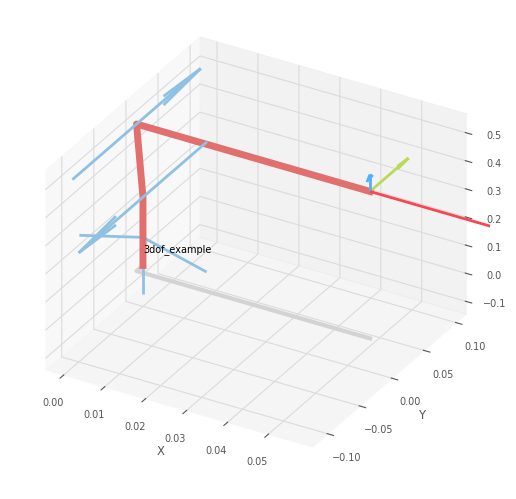

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, '3dof_example')

<Figure size 640x480 with 0 Axes>

In [36]:
import math
import roboticstoolbox as rtb

robot_3dof = rtb.DHRobot(
    [
        rtb.RevoluteDH(
            d = 0.243,
            alpha = math.radians(90),
            a = 0
        ),
        rtb.RevoluteDH(
            d = 0.010,
            alpha = math.radians(180),
            a = 0.280,
            offset = math.radians(90)
        ),
        rtb.RevoluteDH(
            d = 0,
            alpha = math.radians(90),
            a = 0.057,
            offset = math.radians(90)
        )
    ],
    name = "3dof_example"
)

print(robot_3dof)

robot_3dof.plot([0,0,0])

In [ ]:
# Function dk(x, y, z, w, p, r)
# Arguments: Theta 1, Theta 2 , Theta 3 in degrees.
# Output: Vector [x, y, z, w, p, r] in mm and degrees.
def dk(t1: float, t2: float, t3: float) -> np.array:
    """
    The function returns the pose
    of a 3 DOF robot end effector
    using direct kinematics

    Args:
        t1 (float): angle of joint 1 in radians
        t2 (float): angle of joint 2 in radians
        t3 (float): angle of joint 3 in radians

    Returns:
        numpy array: the pose and orientation
    """

    # Denavit-Hartenberg parameters for the 3 DOF robot
    # end effector: H10 * H21 * H32
    H10 = dh(t1, 243, 0, 90)
    H21 = dh(t2 + 90, 10, 280, 180)
    H32 = dh(t3 + 90, 0, 57, 90)
    # the tool has a length of 480 mm
    Htool3 = dh(0, 480, 0, 0)

    # matrix multiplication to get the pose
    # uses numpy's matrix multiplication
    # H = H10 * H21 * H32 * Htool3
    H = np.matmul(H10, H21)
    H = np.matmul(H, H32)
    H = np.matmul(H, Htool3)

    if abs(H[2,0]) == 1:
        p = -H[2,0]*np.pi/2
        w = 0 # valeur arbitraire, on choisit w = 0
        r = np.degrees(np.arctan2(-H[2,0]*H[1,2], H[1,1])) #*180/np.pi
    else:
        p = np.arctan2(-H[2,0], math.sqrt(math.pow(H[0,0],2)+math.pow(H[1,0],2)))
        cp = np.cos(p)
        r = np.arctan2(H[1,0]/cp, H[0,0]/cp)
        w = np.arctan2(H[2,1]/cp, H[2,2]/cp)

        p = np.degrees(p)
        r = np.degrees(r)
        w = np.degrees(w)

    # return the position and orientation of the end effector at the end of the tool
    return np.array([H[0,3], H[1,3], H[2,3], w, p, r])

#### Try some Joint Angles

> ***Run the below cells to see the robot at different joint angles***

In [ ]:
# Test of the function dk(t1,t2,t3)
pose = dk(0,0,0)
print(pose)
# you should try angles passed as parameters to dk(t1,t2,t3).
# Try with several values to validate your calculations.

## Trying Direct Kinematics with the Kinova Gen3 lite

### Measure Directly

Measure the arm joint angles:

1. Move to a desired end effector position manually using the gamepad controller and measure the joint angles using the kinova web interface.
1. Then, use the joint angles to calculate the end effector position using the direct kinematics function.

#### Gen 3 lite robot model

The Gen 3 lite design has been published in the datasheet. The datasheet for the Kinova Gen3 lite can be found online at the Kinova website.

The DH parameters for the Kinova Gen3 lite in the datasheet are as follows:

| Joint | theta | d | a | alpha |
|-------|-------|---|---|-------|
| 1     | 0     | 128.3 + 115.0 | 0 | 90 |
| 2     | 90    | 30 | 280 | 180 |
| 3     | 90    | 20 | 0 | 90 |
| 4     | 90    | 140 + 105 | 0 | 90 |
| 5     | 180   | 28.5 + 28.5 | 0 | 90 |
| 6     | 90    | 105 + 130 | 0 | 0 |


DHRobot: gen3_lite, 6 joints (RRRRRR), dynamics, standard DH parameters
┌───────────┬────────┬──────┬────────┐
│    θⱼ     │   dⱼ   │  aⱼ  │   ⍺ⱼ   │
├───────────┼────────┼──────┼────────┤
│ q1        │ 0.2433 │    0 │  90.0° │
│ q2 + 90°  │   0.03 │ 0.28 │ 180.0° │
│ q3 + 90°  │   0.02 │    0 │  90.0° │
│ q4 + 90°  │  0.245 │    0 │  90.0° │
│ q5 + 180° │  0.057 │    0 │  90.0° │
│ q6 + 90°  │  0.235 │    0 │   0.0° │
└───────────┴────────┴──────┴────────┘

┌─┬──┐
└─┴──┘



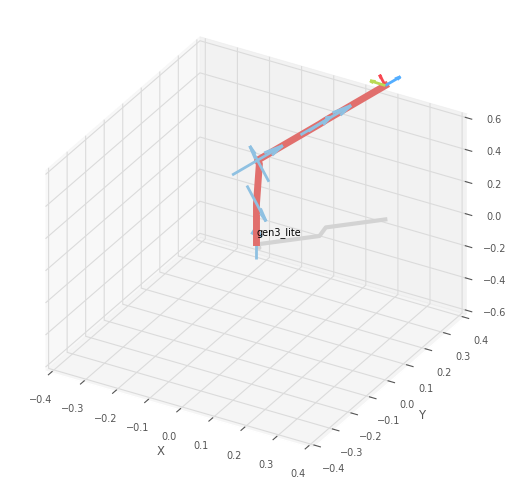

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'gen3_lite')

<Figure size 640x480 with 0 Axes>

In [45]:
import math
import numpy as np
import roboticstoolbox as rtb

# load the gen 3 lite robot model from the robot toolbox
# the DH parameters where sourced from the user manual for the Kinova gen 3 lite robot manipulator
gen3_lite = rtb.DHRobot(
    [
        rtb.RevoluteDH(
            d = 0.1283 + 0.115,
            alpha = math.radians(90),
            a = 0
            ),
        rtb.RevoluteDH(
            d = 0.030,
            alpha = math.radians(180),
            a = 0.280,
            offset = math.radians(90)
            ),
        rtb.RevoluteDH(
            d = 0.020,
            alpha = math.radians(90),
            a = 0,
            offset = math.radians(90)
            ),
        rtb.RevoluteDH(
            d = 0.140 + 0.105,
            alpha = math.radians(90),
            a = 0,
            offset = math.radians(90)
            ),
        rtb.RevoluteDH(
            d= 0.0285 + 0.0285,
            alpha = math.radians(90),
            a = 0,
            offset = math.radians(180)
            ),
        rtb.RevoluteDH(
            d = 0.105 + 0.130,
            alpha = 0,
            a = 0,
            offset = math.radians(90)
        )
    ],
    name = "gen3_lite"
)

print(gen3_lite)

# plot the robot model with some example joint angles
# an example with the same angles in j1, j3, j4, and j6
p_4 = math.radians(45)

# create the joint angles array
# q = np.array([0, 0, 0, 0, 0, 0])
q = np.array([p_4, 0, p_4, p_4, 0, p_4])

# plot the arm
gen3_lite.plot(q, limits=[-0.4, 0.4, -0.4, 0.4, -0.6, 0.6])

### Using the DH function for the Gen3 lite

The function `dh` is used to calculate the transformation matrix for each joint of the Kinova Gen3 lite. The transformation matrices are then multiplied to obtain the transformation from the base frame to the end-effector frame.



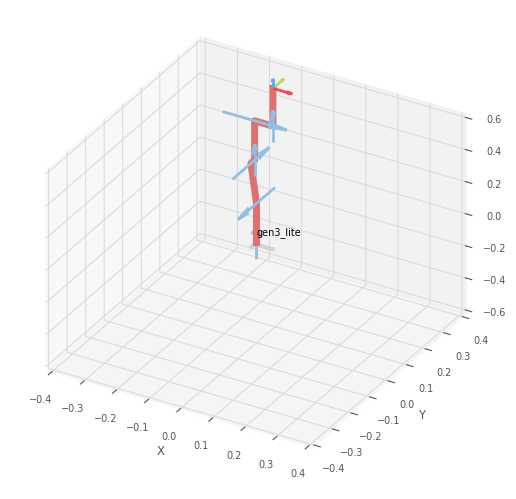

[ 0.057  -0.01    1.0033]


<Figure size 640x480 with 0 Axes>

In [46]:
'''
Find the end effector pose given the measured joint angles
'''

# create an array of joint angles
# for example:
#
# joint_angles = np.array([0,0,0,0,0,0])

# plot the robot model
gen3_lite.plot(joint_angles, limits=[-0.4, 0.4, -0.4, 0.4, -0.6, 0.6])

# get the end effector pose
pose = gen3_lite.fkine(joint_angles)

# print the end effector pose
print(pose.t)

### 